In [2]:
# Apply Decision Tree Classification technique to solve given problem:
# A  dataset  collected  in  a  cosmetics  shop  showing  details  of  customers  and  whether  or  not they  responded  to  a  special  offer  to  buy  a  new  lip-stick  is  shown  in  table  below.  
# Use  this dataset to build a decision tree, with Buys as the target variable, to help in buying lip-sticks in  the  future.  Find  the  root  node  of  decision tree.
# According  to  the  decision  tree  you  have made  from  previous  training  data  set,  what  is  the  decision  for  the  test  data:
# [Age  <  21, Income = Low, Gender = Female, Marital Status = Married]?

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [36]:
data = pd.read_csv("ML7.csv")
data

,Age,Income,Gender,MaritialStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [37]:
le = LabelEncoder()
x = data.iloc[:,:-1]
x = x.apply(le.fit_transform)

In [38]:
print("Age: ",list(zip(data.iloc[:,0],x.iloc[:,0])))
print("Income: ",list(zip(data.iloc[:,1],x.iloc[:,1])))
print("Gender: ",list(zip(data.iloc[:,2],x.iloc[:,2])))
print("MaritialStatus: ",list(zip(data.iloc[:,3],x.iloc[:,3])))

Age:  [('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0)]
Income:  [('High', 0), ('High', 0), ('High', 0), ('Medium', 2), ('Low', 1), ('Low', 1), ('Low', 1), ('Medium', 2), ('Low', 1), ('Medium', 2), ('Medium', 2), ('Medium', 2), ('High', 0)]
Gender:  [('Male', 1), ('Male', 1), ('Male', 1), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0)]
MaritialStatus:  [('Single', 1), ('Married', 0), ('Single', 1), ('Single', 1), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1)]


In [39]:
x

,Age,Income,Gender,MaritialStatus
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [40]:
y = data.iloc[:,-1]
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
Name: Buys, dtype: object

In [41]:
dt = DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [42]:
#[Age < 21, Income = Low,Gender = Female, Marital Status = Married]
query = np.array([1,1,0,0])
pred = dt.predict([query])
pred

array(['Yes'], dtype=object)

[Text(83.7, 199.32, 'X[0] <= 0.5\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(41.85, 163.07999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(125.55000000000001, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(83.7, 126.83999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(167.4, 126.83999999999999, 'X[2] <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(83.7, 90.6, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(41.85, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(125.55000000000001, 54.359999999999985, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(83.7, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.4, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(251.10000000000002, 90.6, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(209.25, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1

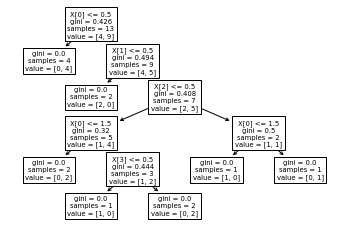

In [43]:
plot_tree(dt)